<a href="https://colab.research.google.com/github/samarkinav/ds_project/blob/main/DSproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymorphy2
!pip install natasha
!pip install nltk

     |████████████████████████████████| 61kB 3.9MB/s 
     |████████████████████████████████| 8.2MB 9.3MB/s 
     |████████████████████████████████| 34.4MB 127kB/s 
     |████████████████████████████████| 51kB 3.9MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26102 sha256=35ca8dc6fb955828d4d17a20d2311f866cb4205a3b6c2347f2bda3866e794247
  Stored in directory: /root/.cache/pip/wheels/f3/f2/66/e9c30d3e9499e65ea2fa0d07c002e64de63bd0adaa49c445bf
Successfully built intervaltree
  Found existing installation: intervaltree 2.1.0
    Uninstalling intervaltree-2.1.0:
      Successfully uninstalled intervaltree-2.1.0


In [14]:
import nltk
import pymorphy2
import pandas as pd
import re
import numpy as np
import collections

In [3]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1d5NQuYPlkvj2IuHMJ2DFvQ_nXX4f70ZC' -O Mosru_dump_all_pages.txt

--2021-04-20 07:31:25--  https://docs.google.com/uc?export=download&id=1d5NQuYPlkvj2IuHMJ2DFvQ_nXX4f70ZC
Resolving docs.google.com (docs.google.com)... 216.58.192.110, 2607:f8b0:4026:800::200e
Connecting to docs.google.com (docs.google.com)|216.58.192.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/se664cvemstvrla0836ukdvgvvdj7udo/1618903875000/03619448018617981983/*/1d5NQuYPlkvj2IuHMJ2DFvQ_nXX4f70ZC?e=download [following]
--2021-04-20 07:31:27--  https://doc-10-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/se664cvemstvrla0836ukdvgvvdj7udo/1618903875000/03619448018617981983/*/1d5NQuYPlkvj2IuHMJ2DFvQ_nXX4f70ZC?e=download
Resolving doc-10-ak-docs.googleusercontent.com (doc-10-ak-docs.googleusercontent.com)... 172.217.3.1, 2607:f8b0:4026:802::2001
Connecting to doc-10-ak-docs.googleusercontent.com (doc-10-ak-docs.googleus

In [4]:
df = pd.read_csv('Mosru_dump_all_pages.txt', engine='python', sep="', '", names=['тема','текст','что-то','ответственный','дата'])
df.head()

,тема,текст,что-то,ответственный,дата
0,'Сообщение о проблеме «Несоблюдение требований...,Выше второго этажа,**********,начальник Объединения административно-техниче...,16 Ноября 2020 в 16:31'
1,'Сообщение о проблеме «Неубранная городская те...,По адресу Снежная д24 расположена музыкальная ...,**********,глава управы района Свиблово города Москвы,05 Мая 2020 в 15:45'
2,'Сообщение о проблеме «Неубранная городская те...,После проведения работ на кабельной канализаци...,**********,начальник Объединения административно-техниче...,01 Марта 2020 в 16:57'
3,'Сообщение о проблеме «Неубранная городская те...,Очистите опору освещения. Приведите в надлежащ...,**********,глава управы района Свиблово города Москвы,16 Января 2020 в 13:54'
4,'Сообщение о проблеме «Захламление территории»...,Более двух недель лежит куча грунта в перемешк...,**************,и.о. главы управы района Свиблово города Москвы,24 Августа 2019 в 15:39'


In [6]:
del df['что-то']

Мы хотим вытащить из последнего столбца даты. Сделаем это с помощью библиотеки Natasha. 

In [7]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,

    DatesExtractor, 

    Doc)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

dates_extractor = DatesExtractor(morph_vocab)

Функция обработки дат:



In [8]:
def preparing_dates(string):
    matches = dates_extractor(string)
    facts = [_.fact.as_json for _ in matches]

    for f in facts:
        date = (f"{f.get('day')}.{f.get('month')}.{f.get('year')}")
    return date

Обрабатывать адреса будем с помощью регулярных выражений. Используя их же, вычленим из первого столбца саму жалобу.

In [10]:
address_list = []
appeal_list = []
for i in range(df.shape[0]):
    df.iloc[i, 3] = preparing_dates(df.iloc[i, 3])

    address_list.append(re.search('по адресу (.*)', df.iloc[i, 0]).group(1))
    appeal_list.append(re.search('«(.*)»', df.iloc[i, 0], flags=re.IGNORECASE).group(1))

df['адрес']=address_list
df['тема']=appeal_list


In [11]:
df.head(20)

,тема,текст,ответственный,дата,адрес
0,Несоблюдение требований к размещению информаци...,Выше второго этажа,начальник Объединения административно-техниче...,16.11.2020,Снежная улица д.26
1,Неубранная городская территория,По адресу Снежная д24 расположена музыкальная ...,глава управы района Свиблово города Москвы,5.5.2020,Снежная улица д.24Д
2,Неубранная городская территория,После проведения работ на кабельной канализаци...,начальник Объединения административно-техниче...,1.3.2020,Снежная улица д.6
3,Неубранная городская территория,Очистите опору освещения. Приведите в надлежащ...,глава управы района Свиблово города Москвы,16.1.2020,Снежная улица д.24Д
4,Захламление территории,Более двух недель лежит куча грунта в перемешк...,и.о. главы управы района Свиблово города Москвы,24.8.2019,Снежная улица д.1А
5,Захламление территории,"Осколки бордюрного камня спрятаны за дерево, в...",глава управы района Свиблово города Москвы,5.5.2019,Снежная улица д.12 с.2
6,Несоблюдение требований к размещению информаци...,Прошу рассмотреть законность размещения вывеск...,глава управы района Свиблово города Москвы,6.2.2019,Снежная улица д.26
7,Несоблюдение требований к размещению информаци...,Просьба проверить законность размещения информ...,глава управы района Свиблово города Москвы,5.10.2018,Снежная улица д.26
8,Несоблюдение требований к размещению информаци...,Здравствуйте! Прошу проверить законность устан...,глава управы района Свиблово города Москвы,22.3.2018,Снежная улица д.23
9,Отсутствие информационного щита,Отсутствуют информационные щиты на всех подобн...,генеральный директор Государственного бюджетн...,5.9.2017,Снежная улица д.6


Мы хоти вытащить из 3 столбца название района, в котором зарегистрирована проблема. Для этого нам нужна функция приведения слова к нормальной форме:

In [40]:
test_df = df.head(2000)

In [17]:
def to_norm(x):
  morph = pymorphy2.MorphAnalyzer()
  p = morph.parse(x)[0]
  return p.normal_form

In [43]:
districts = []
for i in range(test_df.shape[0]):
  if re.search('управы (.*) района', test_df.iloc[i, 2]):
    district = re.search('управы (.*) района', test_df.iloc[i, 2]).group(1)
  elif re.search('района (.*) города', test_df.iloc[i, 2]):
    district = (re.search('района (.*) города', test_df.iloc[i, 2]).group(1))
  elif re.search('района (.*)', test_df.iloc[i, 2]):
    district = (re.search('района (.*)', test_df.iloc[i, 2]).group(1))
  else:
    district = np.nan
  try:
    district = district.replace('»','')
    district = district.replace('"','')
    district = district.strip()
    district = to_norm(district)
  except:
    pass
  districts.append(district)

test_df['район'] = districts

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [45]:
test_df

,тема,текст,ответственный,дата,адрес,район
0,Несоблюдение требований к размещению информаци...,Выше второго этажа,начальник Объединения административно-техниче...,16.11.2020,Снежная улица д.26,NaN
1,Неубранная городская территория,По адресу Снежная д24 расположена музыкальная ...,глава управы района Свиблово города Москвы,5.5.2020,Снежная улица д.24Д,свиблово
2,Неубранная городская территория,После проведения работ на кабельной канализаци...,начальник Объединения административно-техниче...,1.3.2020,Снежная улица д.6,NaN
3,Неубранная городская территория,Очистите опору освещения. Приведите в надлежащ...,глава управы района Свиблово города Москвы,16.1.2020,Снежная улица д.24Д,свиблово
4,Захламление территории,Более двух недель лежит куча грунта в перемешк...,и.о. главы управы района Свиблово города Москвы,24.8.2019,Снежная улица д.1А,свиблово
...,...,...,...,...,...,...
1995,Неубранная городская территория,Мусор на газоне,и.о. главы управы района Восточное Измайлово ...,16.12.2019,Измайловский бульвар д.8,восточное измайловый
1996,Неубранная городская территория,Мешок с мусором на газоне,и.о. главы управы района Восточное Измайлово ...,11.12.2019,Измайловский бульвар д.60\\/10,восточное измайловый
1997,Неубранная городская территория,Мусор на газоне,Глава управы района Измайлово города Москвы,9.12.2019,Измайловский бульвар д.20,измайлово
1998,Несоблюдение требований к размещению информаци...,Витиины заклеены пленкой,Глава управы района Измайлово города Москвы,8.12.2019,Измайловский бульвар д.1\\/28,измайлово


Многие обращения не содержат названия районов. Попробуем создать некий "словарь" формата улица-район

In [46]:
df_street_district = pd.DataFrame(columns=['street','district'])

streets = []
new_districts = []

for i in range(test_df.shape[0]):
  try:
    test_df.iloc[i, 5].isdigit()
    streets.append(re.search('(.*) улица', test_df.iloc[i, 4], flags=re.IGNORECASE).group(1))
    new_districts.append(test_df.iloc[i, 5])
  except:
    pass

df_street_district['district'] = new_districts
df_street_district['street'] = streets
df_street_district.drop_duplicates(inplace=True, ignore_index=True)
df_street_district

,street,district
0,Снежная,свиблово
1,1-я Внуковская,внуково
2,Стахановская,рязанский
3,Делегатская,тверской
4,Плотинная,внуково
5,Стрелецкая,марьина роща
6,Кетчерская,вешняк
7,Подмосковная,покровское-стрешнево
8,Краснодонская,люблино
9,Маломосковская,алексеевский


Заметим, что есть одинаковые названия улиц в разных районов. Попробуем заполнить пропуски районов, опираясь на этот словарь. Алгоритм такой: берем название улицы, ищем её в словаре, если найдено одно совпадение, то записываем в колонку "район" соответствующий район из словаря; если не найдено соответсвий или найдено больше одного - не записываем ничего

In [49]:
for i in range(test_df.shape[0]):
  for j in range(df_street_district.shape[0]):
    try:
      test_df.iloc[i, 5].isdigit()
    except:
      try:
        street = re.search('(.*) улица', test_df.iloc[i, 4], flags=re.IGNORECASE).group(1)
        if street == df_street_district.iloc[j, 0] and collections.Counter(df_street_district.iloc[:,0])[street] == 1:
          test_df.iloc[i, 5] = df_street_district.iloc[j, 1]
      except:
        pass

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [51]:
test_df.head(200)

,тема,текст,ответственный,дата,адрес,район
0,Несоблюдение требований к размещению информаци...,Выше второго этажа,начальник Объединения административно-техниче...,16.11.2020,Снежная улица д.26,свиблово
1,Неубранная городская территория,По адресу Снежная д24 расположена музыкальная ...,глава управы района Свиблово города Москвы,5.5.2020,Снежная улица д.24Д,свиблово
2,Неубранная городская территория,После проведения работ на кабельной канализаци...,начальник Объединения административно-техниче...,1.3.2020,Снежная улица д.6,свиблово
3,Неубранная городская территория,Очистите опору освещения. Приведите в надлежащ...,глава управы района Свиблово города Москвы,16.1.2020,Снежная улица д.24Д,свиблово
4,Захламление территории,Более двух недель лежит куча грунта в перемешк...,и.о. главы управы района Свиблово города Москвы,24.8.2019,Снежная улица д.1А,свиблово
...,...,...,...,...,...,...
195,Наличие ям и выбоин на внутридворовых проездах...,Ямы находятся на траектории движения во двор. ...,Глава управы района Кузьминки,30.5.2013,Есенинский бульвар д.12 к.1,кузьминка
196,Захламление территории,"Перед домом устроили свалку щебня, песка, поло...",глава управы Тверского района города Москвы,16.8.2020,Делегатская улица д.25,тверской
197,Отсутствие или повреждение ограждения строител...,"Нет ограждения, есть опасность попадания в яму...",глава управы Тверского района города Москвы,27.12.2018,Делегатская улица д.16\\/1,тверской
198,Незаконное размещение,Несанкционированное размещение палатки с морож...,"и.о. директора ГБУ ""Жилищник района Тверской""",30.6.2018,Делегатская улица д.7 с.1,тверской


Теперь воспользуемся скрытым размещением Дирихле для тематетического моделирования. Это удобный способ выявления тем, присутствующих в корпусе, а также проявляющихся в разных сочетаниях в каждом документе в корпусе.

In [52]:
!pip install gensim
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 7.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 29.0MB/s 
     |████████████████████████████████| 15.3MB 332kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=0b8649bcfff7f9d68cd83e1626a74e20226cc9979a5b2f5008de8d0daf7e36e1
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

Функция обработки текста включает в себя процесс стемминга (нахождение основы слова)

In [54]:
nltk.download('stopwords')

from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer

russian_stopwords = stopwords.words('russian')
regex = re.compile('[%s]' % re.escape(string.punctuation))
stemmer = SnowballStemmer('russian')

def preprocessing(text):
  text = regex.sub('', text)
  text = [token for token in text.split() if token not in russian_stopwords]
  text = [stemmer.stem(token) for token in text]
  text = [token for token in text if token]
  return ' '.join(text)


In [57]:
for i in range(test_df.shape[0]):
  test_df['текст'] = test_df['текст'].apply(lambda x: preprocessing(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Для улучшения выделения тематик, необходимо выделить коллокации (словосочетания, имеющие признаки синтаксически или семантически целостной единицы). Алгоритм выделения коллокаций реализован в библиотеки Gensim. Для его работы переведем наш корпус из коллекции документов, в коллекцию документов - токенов.

In [58]:
text_clean = []
for index, row in test_df.iterrows():
  text_clean.append(row['текст'].split())

from gensim.models import Phrases
bigram = Phrases(text_clean)
trigram = Phrases(bigram[text_clean])

for idx in range(len(text_clean)):
  for token in bigram[text_clean[idx]]:
    if '_' in token:
      text_clean[idx].append(token)
  for token in trigram[text_clean[idx]]:
    if '_' in token:
      text_clean[idx].append(token)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Теперь в нашем корпусе есть устойчивые выражения, и они не будут рассмотрены как отдельные слова, тем самым повысилась устойчивость корпуса.
Следующим шагом преобразуем наш корпус в словарь частот.

In [59]:
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(text_clean)
dictionary.filter_extremes(no_below=10, no_above=0.1)
corpus = [dictionary.doc2bow(doc) for doc in text_clean]
print('Количество уникальных токенов: %d' % len(dictionary))
print('Количество документов: %d' % len(corpus))

Количество уникальных токенов: 466
Количество документов: 2000


Создание LDA модели:

In [60]:
from gensim.models.ldamulticore import LdaMulticore
model = LdaMulticore(corpus=corpus, id2word = dictionary, num_topics=4)
model.show_topics()

[(0,
  '0.033*"рекламн_конструкц" + 0.031*"строительн_мусор" + 0.021*"строительн" + 0.019*"конструкц" + 0.016*"работ" + 0.015*"территор" + 0.013*"улиц" + 0.011*"прош_провер" + 0.011*"размещ" + 0.010*"захламл_территор"'),
 (1,
  '0.018*"прош_убр" + 0.016*"территор" + 0.016*"тактильн_плитк" + 0.014*"проезж_част" + 0.012*"убр" + 0.012*"строительн_площадк" + 0.012*"просьб" + 0.011*"брош_мешк" + 0.011*"вывеск" + 0.010*"наруш_треб"'),
 (2,
  '0.025*"незакон_рекламн" + 0.016*"территор" + 0.015*"конструкц" + 0.013*"рекл" + 0.013*"просьб_убр" + 0.013*"незакон_рекл" + 0.012*"тротуар" + 0.012*"размещ" + 0.012*"рекламн_конструкц" + 0.012*"адрес"'),
 (3,
  '0.030*"прош_провер" + 0.020*"размещ" + 0.015*"информацион" + 0.014*"провер" + 0.013*"лестниц" + 0.013*"работ" + 0.013*"газон" + 0.011*"отсутств_информацион" + 0.011*"вывеск" + 0.011*"треб"')]

In [68]:
import pyLDAvis.gensim_models
import gensim
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)

ImportError: ignored

Теперь подберем самый важный параметр - количество тем. Для этого нам понадобится такое понятие, как когерентность. Тема называется когерентной (или согласованной), если термины, наиболее частые в данной теме, неслучайно часто соместно встречаются рядом в документах коллекции. Для оценивания когерентности будем использовать поточечную взаимную информацию (pointwise mutual information, PMI)

In [73]:
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
  coherence_values = []
  model_list = []
  for num_topics in range(start, limit, step):
    model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
  return [model_list, coherence_values]


model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_clean, start=2, limit=40, step=2)

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sc

Для понимания согласованности визуализируем как количество тем влияют на согласованность, создадим график при помощи пакета Matplotlib

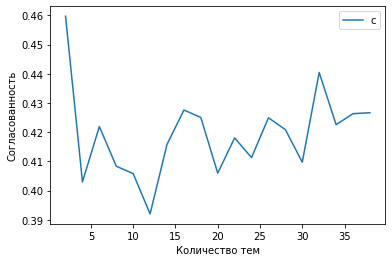

In [76]:
import matplotlib.pyplot as plt
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Количество тем')
plt.ylabel('Согласованность')
plt.legend(('coherence_values'), loc='best')
plt.show()